<a href="https://colab.research.google.com/github/pazcalll/PCVK_Genap_2021/blob/main/week12.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from google.colab import drive
drive.mount('/content/drve')

Drive already mounted at /content/drve; to attempt to forcibly remount, call drive.mount("/content/drve", force_remount=True).


In [2]:
import cv2 as cv
import numpy as np
from matplotlib import pyplot as plt
from __future__ import print_function
import sys

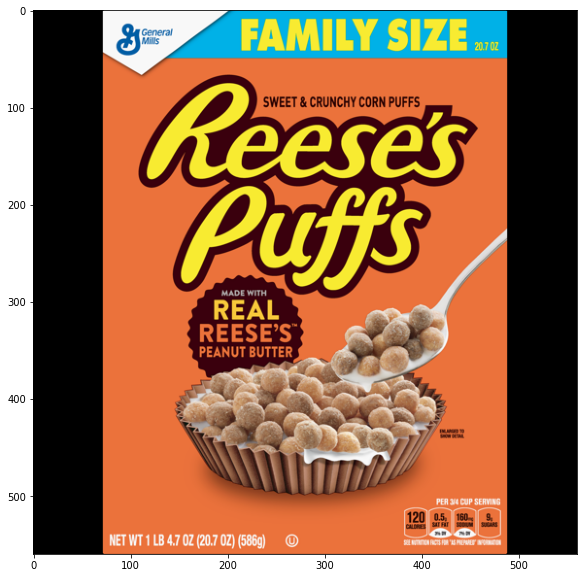

In [3]:
def display(img, cmap='gray'):
  img = cv.cvtColor(img, cv.COLOR_BGR2RGB)
  fig = plt.figure(figsize=(12,10))
  ax = fig.add_subplot(111)
  ax.imshow(img, cmap='gray')
reeses = cv.imread('/content/drve/MyDrive/PCVK/Images/reeses_puffs.png')
display(reeses)

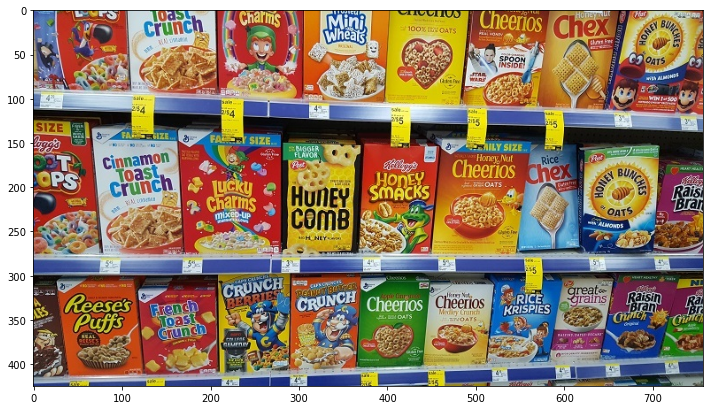

In [4]:
cereals= cv.imread('/content/drve/MyDrive/PCVK/Images/many_cereals.jpg')
display(cereals)

In [5]:
orb = cv.ORB_create()
kp1, des1 = orb.detectAndCompute(reeses,None)
kp2, des2 = orb.detectAndCompute(cereals,None)
bf = cv.BFMatcher(cv.NORM_HAMMING, crossCheck = True)
matches = bf.match(des1, des2)
single_match = matches[0]
single_match.distance

47.0

In [6]:
len(matches)

140

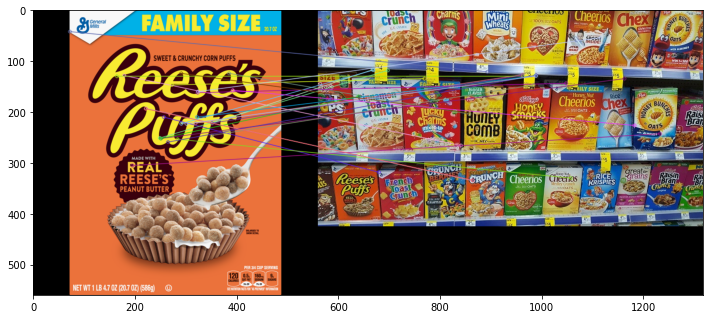

In [7]:
matches = sorted(matches,key=lambda x:x.distance)
reeses_match = cv.drawMatches(reeses,kp1,cereals,kp2,matches[:25],None,flags=2)
display(reeses_match)

In [16]:
# !pip install opencv-contrib-python==4.4.0.44

     |████████████████████████████████| 55.7MB 71kB/s 
  Found existing installation: opencv-contrib-python 4.1.2.30
    Uninstalling opencv-contrib-python-4.1.2.30:
      Successfully uninstalled opencv-contrib-python-4.1.2.30


In [9]:
sift = cv.xfeatures2d.SIFT_create()
kp1,des1 = sift.detectAndCompute(reeses,None)
kp2,des2 = sift.detectAndCompute(cereals, None)
bf = cv.BFMatcher()
matches = bf.knnMatch(des1,des2,k=2)

good = []

# Makin kecil jarak makin cocok
# ratio match < 75% Match2
for match1,match2 in matches:
  # jika jarak match1 lebih kecil dari jarak 75% match2
  # descriptor disimpan
  if match1.distance < 0.75*match2.distance:
    good.append([match1])

len(good)

77

In [10]:
len(matches)

1501

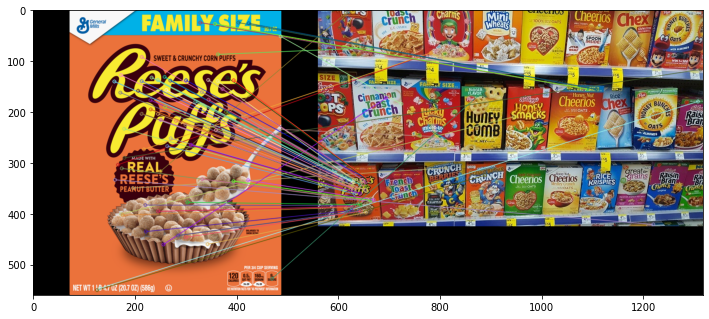

In [11]:
sift_matches = cv.drawMatchesKnn(reeses, kp1, cereals,kp2, good, None,flags=2)
display(sift_matches)

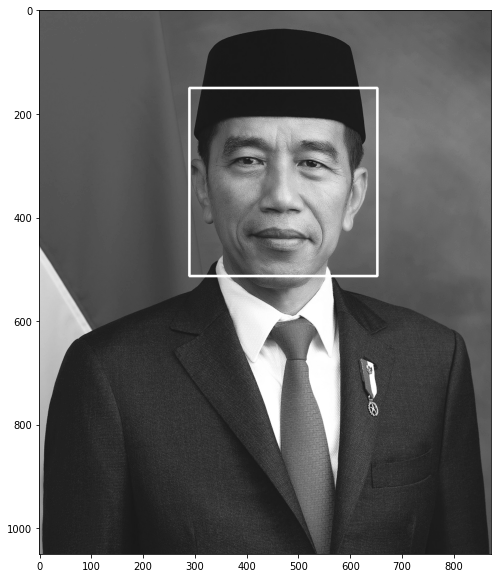

In [14]:
cascade_wajah = cv.CascadeClassifier('/content/drve/MyDrive/PCVK/haarcascades/haarcascade_frontalface_alt.xml')
jokowi = cv.imread('/content/drve/MyDrive/PCVK/Images/jokowi.jpg',0)
roi_wajah = cascade_wajah.detectMultiScale(jokowi)
for(x,y,w,h) in roi_wajah:
  cv.rectangle(jokowi,(x,y),(x+w,y+h),(255,255,255),3)
plt.figure(figsize = (10,10))
plt.imshow(jokowi, cmap='gray')